In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor

In [2]:
# Importing unnormalized data from pre-processing

X_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_kidney")
X_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_kidney")
y_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_kidney")
y_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_kidney")
X_train.head()

,CensusTract,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,36005038302,8.197244,41.130600,1.991477,44.522326,0.762018,1613.805696,0.709486,0.101419,0.404786,50.713810,2.054157e-07
1,48497150102,8.740421,46.845080,0.241112,32.155001,0.476635,16.370830,0.011220,0.035598,0.187473,0.138447,2.180937e-05
2,36061019200,8.378278,40.453252,2.284949,48.123066,0.846904,11192.646834,0.719445,0.203452,1.226315,156.277674,1.099816e-02
3,36001000501,6.849714,37.679594,0.572823,29.065899,0.379349,1228.996332,0.600163,0.364465,1.449871,6.371724,0.000000e+00
4,44007017000,6.569162,41.270797,0.515077,26.347587,0.338060,429.818914,0.483532,0.106803,1.906897,2.995869,6.165652e+00


In [3]:
# Getting rid of extra column

X_test.set_index("CensusTract", inplace=True)
X_train.set_index("CensusTract", inplace=True)

In [4]:
print(y_test.shape, y_train.shape)

(18081, 2) (54242, 2)


In [5]:
y_test.head()

,CensusTract,Kidney_prevalence
0,6059075816,2.4
1,18097356400,3.9
2,24041960700,3.7
3,36047117202,2.7
4,6097151310,1.5


In [6]:
y_test.mean()

CensusTract          2.800064e+10
Kidney_prevalence    2.960389e+00
dtype: float64

In [7]:
# Getting rid of extra column

y_train.set_index("CensusTract", inplace=True)
y_test.set_index("CensusTract", inplace=True)

In [8]:
print(y_test.shape, y_train.shape)

(18081, 1) (54242, 1)


In [9]:
# Putting y into the correct shape for model

y_test = np.array(y_test).reshape(18081,)
y_train = np.array(y_train).reshape(54242,)
print(y_test.shape, y_train.shape)

(18081,) (54242,)


In [10]:
X_test.head()

,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
6059075816,12.151509,50.865846,0.548453,40.183384,0.584031,2204.370178,0.085022,0.080120,0.193642,6.973660,0.000000
18097356400,9.433787,43.658646,1.162104,33.280415,0.500701,1780.890340,0.770576,0.901959,5.598418,9.684561,0.253114
24041960700,7.817470,46.228653,0.211976,24.327900,0.307941,0.000000,0.288705,0.018880,0.044985,0.078767,0.000000
36047117202,8.302228,40.677859,1.564745,40.855027,0.667480,806.742855,0.855874,0.525864,2.218134,57.687570,0.000000
6097151310,9.922541,31.816375,0.166398,21.738631,0.330124,458.366364,0.002943,0.018466,0.061815,2.263553,0.000000


In the pre-processeing notebook, I have already done multiple OLS on the data and found no reasonable correlation. In this notebook, the first type of model I will use will be random forest.

In [79]:
# Instantiating RandomForestRegressor with default parameters

rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [80]:
y_pred = rf.predict(X_test)

In [81]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4736438252169817
MAE: 0.4369861180244456
MSE: 0.3907160679165975
RMSE: 0.6250728500875699


In [11]:
# Instantiating RandomForestRegressor and randomly searching for best hyperparameters n_estimators and max_depth

rf = RandomForestRegressor() 
params = {"n_estimators": range(1,500), "max_depth":range(1,30)}

rs = RandomizedSearchCV(rf, params)

In [12]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(1, 30),
                                        'n_estimators': range(1, 500)})

In [13]:
rs.best_estimator_

RandomForestRegressor(max_depth=28, n_estimators=376)

In [17]:
y_pred = rs.predict(X_test)

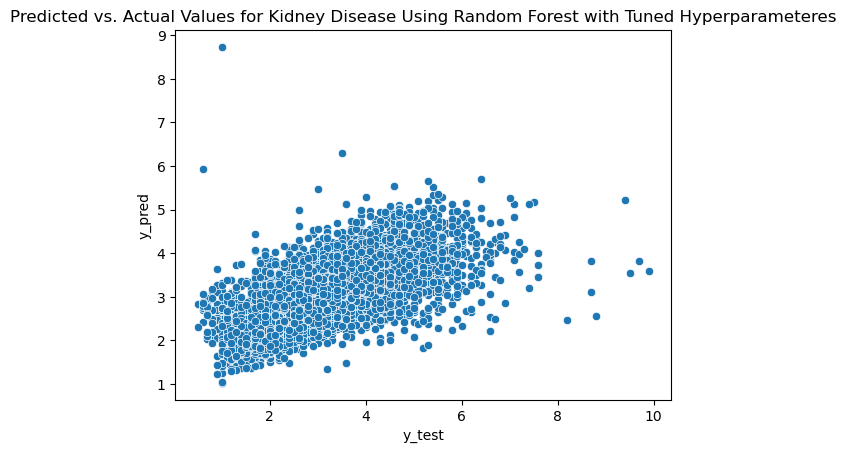

In [18]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Kidney Disease Using Random Forest with Tuned Hyperparameteres")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [19]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.47555367790317626
MAE: 0.43542188328597003
MSE: 0.3892983774484321
RMSE: 0.6239377993425563


In [82]:
# Instantiating AdaBoostRegressor with default parameters

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [83]:
y_pred = ada.predict(X_test)

In [85]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.3598748119159725
MAE: 0.8363375103660666
MSE: 1.0094399283710527
RMSE: 1.0047088774222375


Since Adaboost with the default hyperparameters is not giving reasonable results, the next step will be to search for the best hyperparameters.

In [86]:
# Instantiating AdaBoost Regressor and randomly searching for best hyperparameters n_estimators and learning rate

ada = AdaBoostRegressor()
params = {"n_estimators": range(1,500), "learning_rate":np.arange(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [87]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x10d5b3340>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x10d5a2e80>})

In [88]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=4.176043798991274, n_estimators=166)

In [90]:
y_pred = rs.predict(X_test)

In [91]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -1.0438494439612924
MAE: 0.9560794876177092
MSE: 1.5171567398962797
RMSE: 1.2317291666175156


This just made the results worse. 

In [92]:
# Instantiating GradientBoostingRegressor using default parameters

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [93]:
y_pred = gb.predict(X_test)

In [94]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.2688862936998646
MAE: 0.5263247207150655
MSE: 0.5427083146564715
RMSE: 0.7366873927633563


Now with randomly tuned hyperparameters.

In [95]:
# Instantiating GradientBoostingRegressor and randomly searching for best hyperparameters n_estimators and learning rate

gb = GradientBoostingRegressor()
params = {"n_estimators": range(1,500), "max_leaf_nodes": range(2,100), 'learning_rate': np.arange(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [96]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x10d5ec5e0>,
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]})

In [97]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.20161534787827692, max_leaf_nodes=10,
                          n_estimators=500)

In [99]:
y_pred = rs.predict(X_test)

In [100]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.3636562498035769
MAE: 0.48629850414769227
MSE: 0.47236023786087716
RMSE: 0.6872846847274259


This is still not as good as Random Forest. Next model will be XGBoost.

In [101]:
# Instantiating XGBRegressor with default parameters

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [102]:
y_pred = xgb.predict(X_test)

In [103]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.401712736092411
MAE: 0.47072770711654494
MSE: 0.4441107722065135
RMSE: 0.666416365500213


This is still not as good as Random Forest, so I will do hyperparameter tuning on max_depth, min_child_weight, and gamma.

In [104]:
# Instantiating XGBRegressor Regressor and randomly searching for best hyperparameters max_depth, min_child_weight, and gamma.

xgb = XGBRegressor()
params = {"max_depth": range(1,200), "min_child_weight":range(1,200), "gamma":range(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [105]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x10f8e8490>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x10f8e8610>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x10f8ee100>})

In [106]:
rs.best_params_

{'gamma': 10, 'max_depth': 123, 'min_child_weight': 86}

In [108]:
y_pred = rs.predict(X_test)

In [109]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.40511796284452894
MAE: 0.46941200232691727
MSE: 0.441583060229922
RMSE: 0.6645171632320132


This is only slightly better than without tuning the hyperparameters. I will try LightGBM.

In [110]:
# Instantiating LGBMRegressor and using RandomizedSearch to determine the best values for reg_alpha and reg_l

lgbm = ltb.LGBMRegressor()
params = {"reg_alpha": np.arange(1e-3,100), "reg_lambda": np.arange(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [111]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x10f8e8310>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x10f904190>})

In [112]:
rs.best_estimator_

LGBMRegressor(reg_alpha=0.8173302116741544, reg_lambda=83.85066137218855)

In [114]:
y_pred = rs.predict(X_test)

In [115]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.37038338411064786
MAE: 0.48294864171804314
MSE: 0.4673666620452442
RMSE: 0.6836422032359063


This is not as good as XGBoost

In [54]:
# Importing normalized data

X_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_CHD")
X_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_CHD")
y_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_CHD")
y_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_CHD")
X_train_log.head()

,CensusTract,PM25,OZONE,DieselPM,AirToxicsRisk,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,32003002961,7.020828,55.534960,0.917367,0.287083,0.530685,0.344931,-1.293792,-1.380519,0.247426,0.507938
1,18097310204,9.312653,44.314528,0.839156,-0.128422,-0.115502,0.054532,-1.041797,0.462086,1.963273,0.927542
2,48453001308,9.493040,41.367930,0.615746,0.371394,0.170443,1.201532,-0.211880,-1.151121,0.588443,0.592208
3,15009030301,0.000000,0.000000,-2.295210,-3.831500,-3.047175,-1.148260,-0.453107,-1.367256,0.178587,-0.916296
4,6111000200,8.453749,57.221836,-1.199415,0.155523,0.384052,0.125365,0.366184,0.416839,0.400620,-1.252648


In [55]:
# Getting rid of extra column

X_train_log.set_index("CensusTract", inplace=True)
X_test_log.set_index("CensusTract", inplace=True)
print(X_train_log.shape, X_test_log.shape, y_train_log.shape, y_test_log.shape)

(54242, 10) (18081, 10) (54242, 2) (18081, 2)


In [56]:
y_train_log.head()

,Unnamed: 0,0
0,0,0.753435
1,1,-0.674186
2,2,-1.456287
3,3,-0.289581
4,4,-0.506651


In [57]:
# Putting y into correct shape for model

y_train_log.drop("Unnamed: 0", axis=1, inplace=True)
y_test_log.drop("Unnamed: 0", axis=1, inplace=True)
y_train_log = np.array(y_train_log)
y_train_log = y_train_log.ravel()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.ravel()
print(y_train.shape, y_test.shape)

(54242,) (18081,)


In [58]:
# Instantiating support vector machine regressor and randomly searching for best hyperparameters C and epsilon.

svm = SVR()
params = {"C":np.arange(.01,10), "epsilon":np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [59]:
svm_rs.fit(X_train_log, y_train_log)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15f429490>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x10811e880>})

In [60]:
svm_rs.best_estimator_

SVR(C=2.5680680987425695, epsilon=1.5560143445814183)

In [63]:
y_pred_log = svm_rs.predict(X_test_log)

In [64]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -6.821200428668663
MAE: 2.410419939807706
MSE: 8.044330759909482
RMSE: 2.8362529435699986


These metrics show that SVM regression is not a good predictor for this data.

## Random forest with best hyperparameters from randomized search gave the best R<sup>2</sup> value. However, even this is not a high enough correlation for random forest to be a reasonable model.